### Tarea 7.7

Considere la ecuación diferencial que se ha resuelto en los ejemplos de clase:

$$
y'(t) = y(t) - t^2 + 1\,,\quad 0 \leq t \leq 2\,,
$$

pero ahora con una condición inicial

$$
y(0) = 0.5 + \delta_o
$$

donde $\delta_o$ es un error cometido al fijar la condición.

* Resuelva esta ecuación usando el método de Euler con una precisión de $10^{-4}$. Considere varios valores de $\delta_o$ entre $-0.1$ y $0.1$ y grafique $y(2)$ en función de $\delta_o$.

* Compare su resultado con el valor de $y(2)$ obtenido de la solución analítica $y(t) = (t + 1)^2 - 0.5e^t$. Comente.

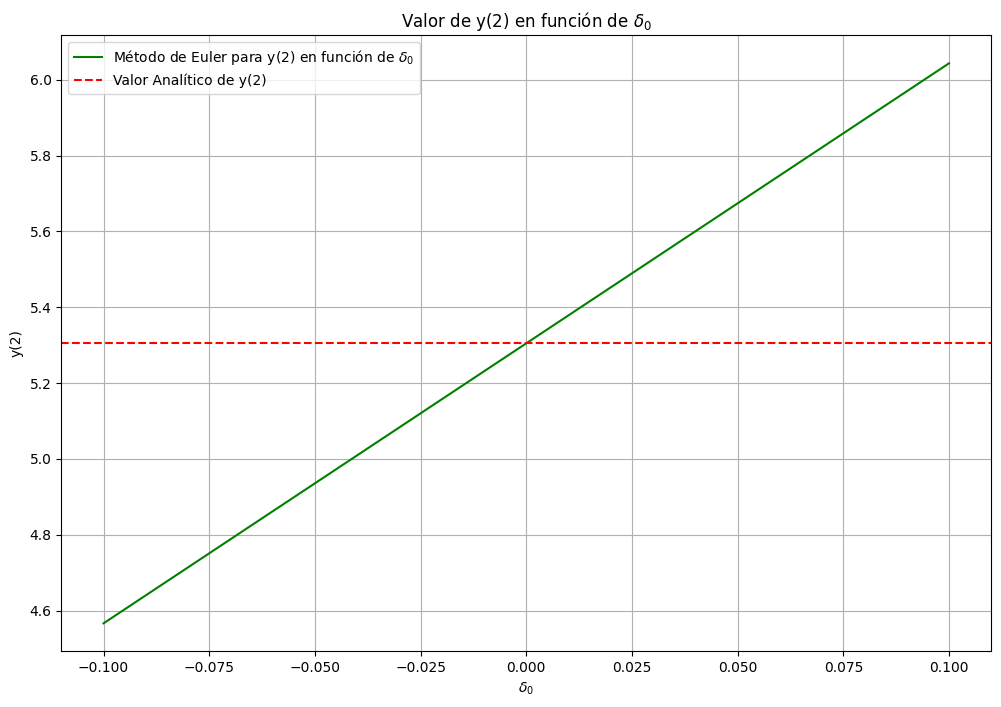

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def euler(f, a, b, yo, N): #Este es la función definida en la Clase 15

    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)

    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h

    ts[N] = t
    sol[N] = w

    return ts, sol

def f(t, y): # La ecuación diferencial
    return y - t**2 + 1

deltas = np.linspace(-0.1, 0.1, 100)  #Los valores de delta entre -0.1 y 0.1

valores_y2 = []  #Aquí se guardarán los valores de y(2) en función de delta

for delta in deltas:
    valores_y2.append(euler(f, 0, 2, 0.5 + delta, 10000)[1][-1]) #Como la función euler retorna dos valores, solo necesitamos el último valor de la lista sol

def solucion_analitica(t):
    return (t + 1)**2 - 0.5 * np.exp(t)

valor_real_y2 = solucion_analitica(2) # Valor analítico de y(2)

#Graficamos los valores de y(2) en función de delta

plt.figure(figsize=(12, 8))
plt.plot(deltas, valores_y2, label='Método de Euler para y(2) en función de $δ_0$', color='green')
plt.axhline(y=valor_real_y2, color='red', linestyle='--', label='Valor Analítico de y(2)')
plt.title('Valor de y(2) en función de $δ_0$')
plt.xlabel('$δ_0$')
plt.ylabel('y(2)')
plt.legend()
plt.grid()
plt.show()

Si cometemos un error de 0.1 en la condición inicial, el error del valor y(2) es muy grande. A medida que reducimos el valor de $δ_0$, el valor de y(2) se acerca más a la solución analítica.